## **Wavelet Transform Analysis of 1-D Signals using Python**

Use a Multiple Resolution to Decompose Signal

In [109]:
import pywt
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft

### **訊號例子**

(1024,)


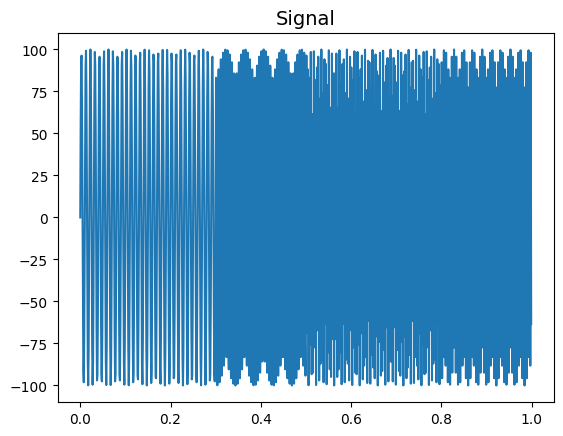

In [110]:
sample_rate = 1024 # 取樣頻率 [pts/sec] =fs (sampling frequency)
d = 1/sample_rate # 取樣間隔(週期) d = 1/fs [sec/pts]
t_domain = np.arange(0, 1.0, d)  # 畫出以取樣間隔 d，時間0~1秒的時域座標 : 共 1024個點
print(t_domain.shape)

# 生成隨時間變化的正弦波形
f1 = 100
f2 = 200
f3 = 300
f4 = 400
data = np.piecewise(t_domain, [t_domain < 1, t_domain < 0.8, t_domain < 0.5, t_domain < 0.3],
                    [lambda t_domain : 100 * np.sin(2 * np.pi * f4 * t_domain),
                     lambda t_domain : 100 * np.sin(2 * np.pi * f3 * t_domain),
                     lambda t_domain : 100 * np.sin(2 * np.pi * f2 * t_domain),
                     lambda t_domain : 100 * np.sin(2 * np.pi * f1 * t_domain)])
plt.plot(t_domain, data)
plt.title('Signal', fontsize = 14)
plt.show()

(1024,)
(512,)


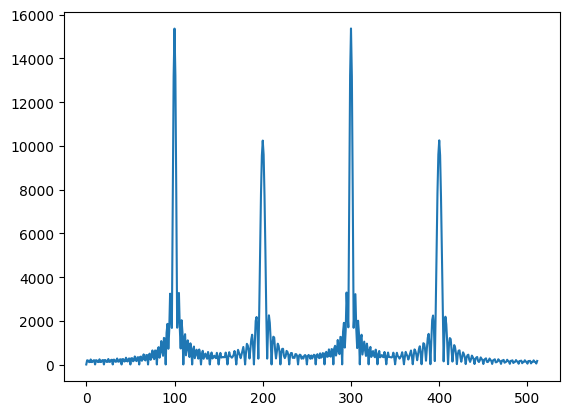

In [111]:
print(data.shape)
data_FFT = fft(data)
data_FFT = abs(data_FFT[:int(len(data)/2)])

print(data_FFT.shape)
plt.plot(data_FFT)

### **多層DWT小波轉換 (DB小波基)**

coeffs : cA_n, cD_n, cD_(n-1), ..., cD_1

3
cA2.shape = (256,)
cD2.shape = (256,)
cD1.shape = (512,)


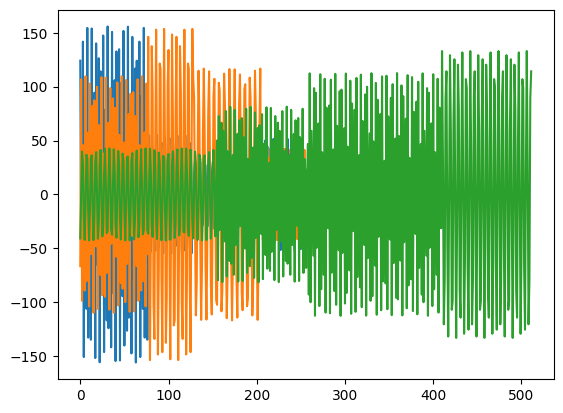

In [112]:
coeffs = pywt.wavedec(data, 'haar', level= 2) # DWT ， 二層分解， mode = periodic - 週期性的訊號 (∵訊號對稱)

print(len(coeffs))
cA2, cD2, cD1 = coeffs

print('cA2.shape =', cA2.shape)
print('cD2.shape =', cD2.shape)
print('cD1.shape =', cD1.shape)


plt.plot(cA2)
plt.plot(cD2)
plt.plot(cD1)

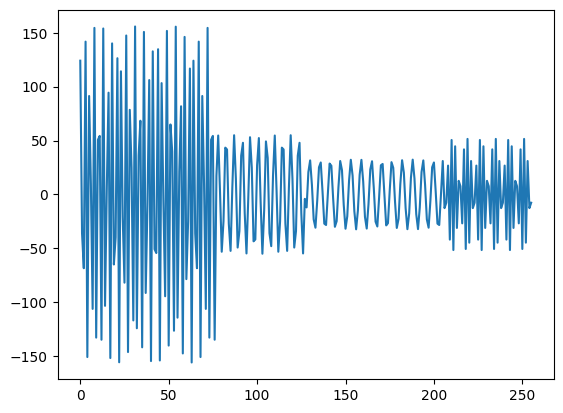

In [113]:

plt.plot(cA2)


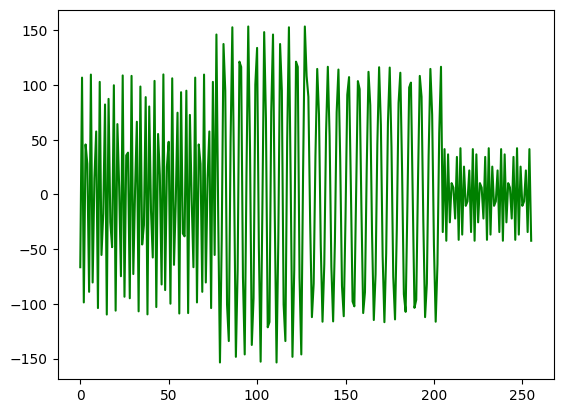

In [114]:
plt.plot(cD2,'g')


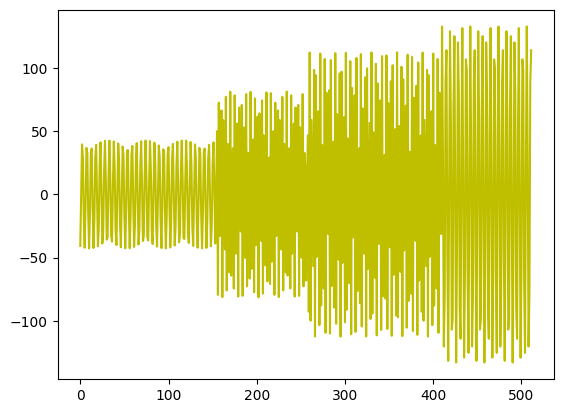

In [115]:
plt.plot(cD1,'y')

(256,)
(128,)


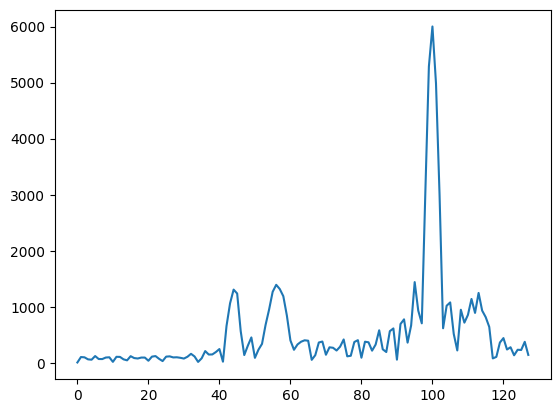

In [116]:
print(cA2.shape)
cA2_FFT = fft(cA2)
cA2_FFT = abs(cA2_FFT[:int(len(cA2_FFT)/2)])

print(cA2_FFT.shape)
plt.plot(cA2_FFT)

(512,)
(256,)


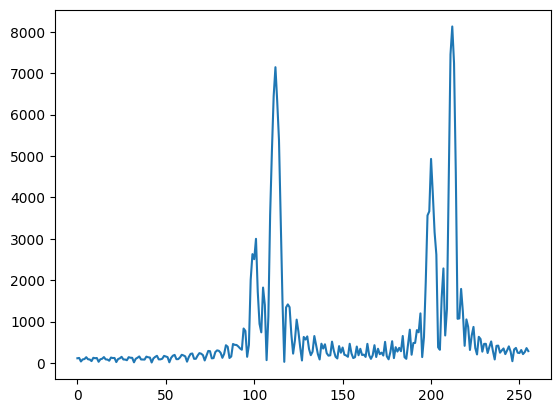

In [117]:
print(cD1.shape)
cD1_FFT = fft(cD1)
cD1_FFT = abs(cD1_FFT[:int(len(cD1_FFT)/2)])

print(cD1_FFT.shape)
plt.plot(cD1_FFT)

(256,)
(128,)


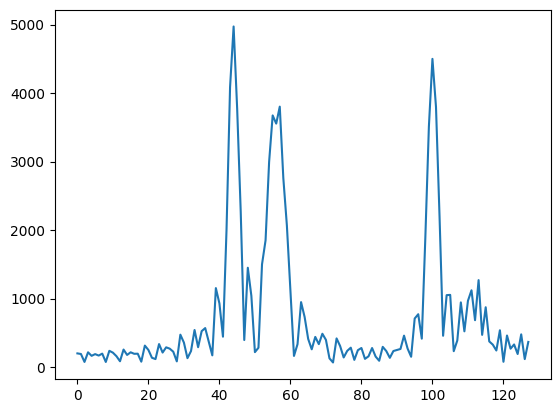

In [118]:
print(cD2.shape)
cD2_FFT = fft(cD2)
cD2_FFT = abs(cD2_FFT[:int(len(cD2_FFT)/2)])

print(cD2_FFT.shape)
plt.plot(cD2_FFT)

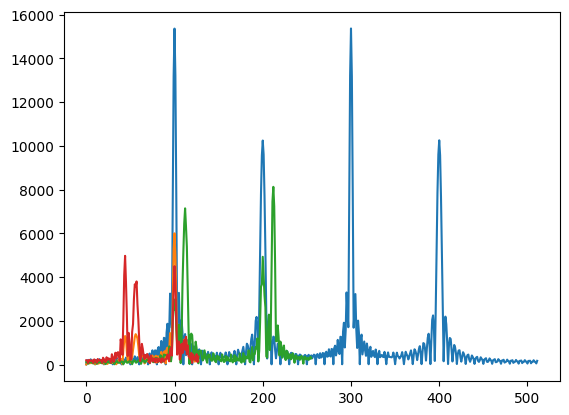

In [119]:
plt.plot(data_FFT)
plt.plot(cA2_FFT)
plt.plot(cD1_FFT)
plt.plot(cD2_FFT)

### **多層SWT轉換 - 沒有降取樣的DWT**

3
cA2.shape = (1024,)
cD2.shape = (1024,)
cD1.shape = (1024,)


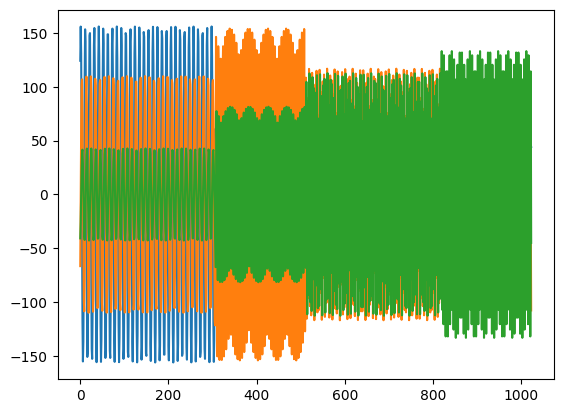

In [120]:
coeffs = pywt.swt(data, 'haar', level= 2, trim_approx = True) # DWT ， 二層分解， mode = periodic - 週期性的訊號 (∵訊號對稱)

print(len(coeffs))
cA2, cD2, cD1 = coeffs

print('cA2.shape =', cA2.shape)
print('cD2.shape =', cD2.shape)
print('cD1.shape =', cD1.shape)


plt.plot(cA2)
plt.plot(cD2)
plt.plot(cD1)

(1024,)
(512,)
(1024,)
(512,)
(1024,)
(512,)


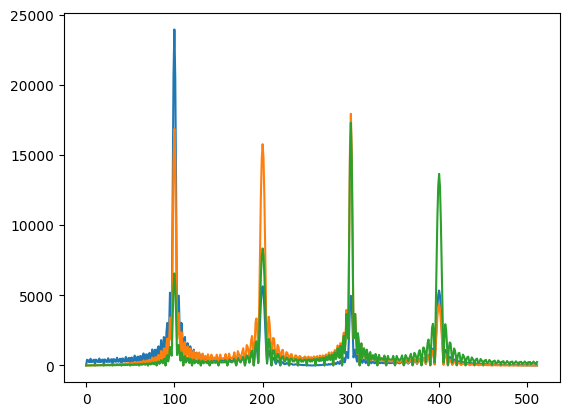

In [121]:
print(cA2.shape)
cA2_FFT = fft(cA2)
cA2_FFT = abs(cA2_FFT[:int(len(cA2_FFT)/2)])

print(cA2_FFT.shape)
plt.plot(cA2_FFT)

print(cD2.shape)
cD2_FFT = fft(cD2)
cD2_FFT = abs(cD2_FFT[:int(len(cD2_FFT)/2)])

print(cD2_FFT.shape)
plt.plot(cD2_FFT)


print(cD1.shape)
cD1_FFT = fft(cD1)
cD1_FFT = abs(cD1_FFT[:int(len(cD1_FFT)/2)])

print(cD1_FFT.shape)
plt.plot(cD1_FFT)

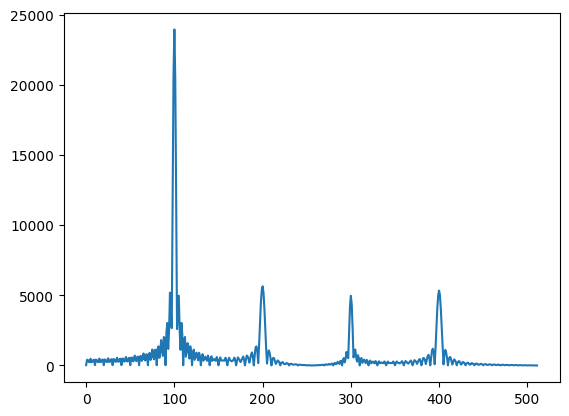

In [122]:
plt.plot(cA2_FFT)

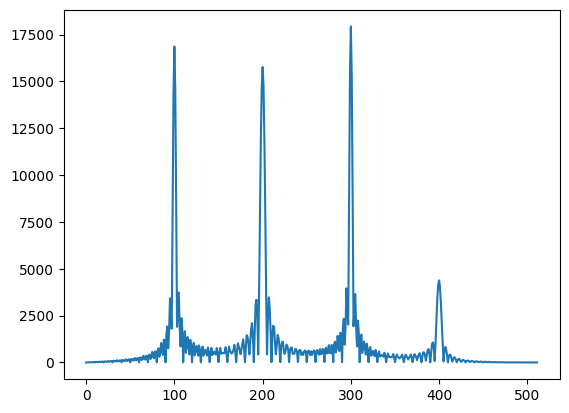

In [125]:
plt.plot(cD2_FFT)

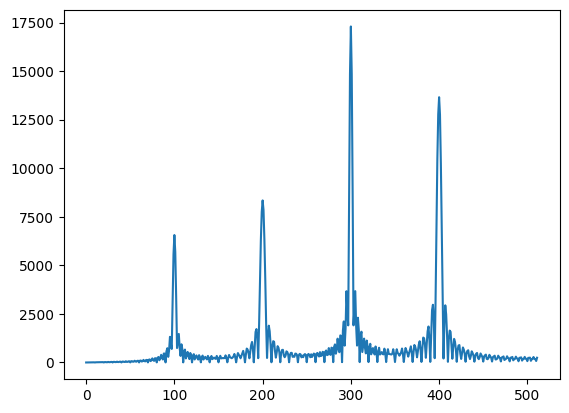

In [126]:
plt.plot(cD1_FFT)

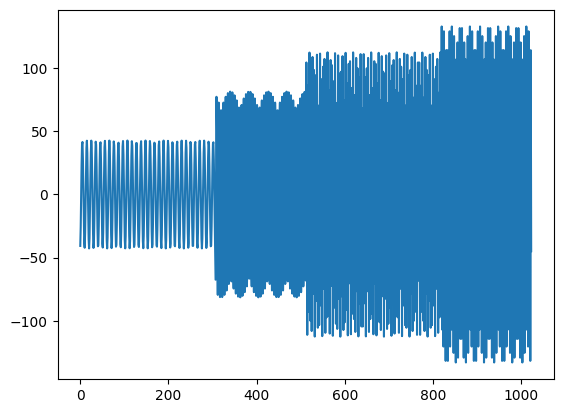

In [132]:
plt.plot(cD1)